# Notebook to Create the `Allocation Time` CSV File

In [1]:
import pandas as pd
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# "GOOG_sub_trace_10k_4GM_25LM"
BASE_FILE_PATH = Path("New_GOOG_sub_trace_50k_1GM_1LM")
SPARROW_CSV_FILE_NAME = "sparrow_modified_GOOG_50_000.csv"
MEGHA_CSV_FILE_NAME = "record-2022-01-06-18-02-54_jobs_info.csv"

NETWORK_DELAY = 0.0005

# Loading the Sparrow CSV File

In [3]:
SPARROW_CSV_FILE_COLUMN_NAME_LIST = ["Job ID", "Task ID", "Job Arrival Time",
                                     "Task Launch Time", "Task Duration (Trace)",
                                     "Task End Time On Node"]

In [4]:
SPARROW_CSV_FILE_PATH = BASE_FILE_PATH / Path(SPARROW_CSV_FILE_NAME)

sparrow_df = pd.read_csv(SPARROW_CSV_FILE_PATH,
                         names=SPARROW_CSV_FILE_COLUMN_NAME_LIST
                        )
sparrow_df["Task End Time On Node (Dervied)"] = sparrow_df["Task Launch Time"] + sparrow_df["Task Duration (Trace)"]

sparrow_df["Allocation Time"] = sparrow_df["Task Launch Time"] - sparrow_df["Job Arrival Time"]

sparrow_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task End Time On Node,Task End Time On Node (Dervied),Allocation Time
0,1,0,281294.20,281294.2015,79782,361076.2015,361076.2015,0.0015
1,1,1,281294.20,281294.2015,80279,361573.2015,361573.2015,0.0015
2,1,2,281294.20,281294.2015,78543,359837.2015,359837.2015,0.0015
3,1,3,281294.20,281294.2015,79460,360754.2015,360754.2015,0.0015
4,1,4,281294.20,281294.2015,84355,365649.2015,365649.2015,0.0015
...,...,...,...,...,...,...,...,...
312553,5654,0,298605.86,311972.6045,67,312039.6045,312039.6045,13366.7445
312554,5356,0,298509.40,312296.6115,112,312408.6115,312408.6115,13787.2115
312555,6873,0,298984.06,314737.0105,513,315250.0105,315250.0105,15752.9505
312556,2502,0,296652.65,341307.2045,297,341604.2045,341604.2045,44654.5545


In [5]:
# assert sparrow_df['Task End Time On Node'].equals(sparrow_df['Task End Time On Node (Dervied)'])

In [6]:
sparrow_df.dtypes

Job ID                               int64
Task ID                              int64
Job Arrival Time                   float64
Task Launch Time                   float64
Task Duration (Trace)                int64
Task End Time On Node              float64
Task End Time On Node (Dervied)    float64
Allocation Time                    float64
dtype: object

# Loading the Megha CSV File

In [7]:
MEGHA_CSV_FILE_PATH = BASE_FILE_PATH / Path(MEGHA_CSV_FILE_NAME)
megha_df = pd.read_csv(Path(MEGHA_CSV_FILE_PATH))

megha_df["Allocation Time"] = megha_df["Task Launch Time"] - megha_df["Job Arrival Time"] + NETWORK_DELAY

megha_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node,Allocation Time
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015,0.0015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015,0.0015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015,0.0015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015,0.0015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015,0.0015
...,...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,299997.931,53,53.0015,0.001,300050.9315,0.0015
312554,9997,18,299997.93,299997.931,43,43.0015,0.001,300040.9315,0.0015
312555,9998,1,299997.94,299997.941,186,186.0015,0.001,300183.9415,0.0015
312556,9999,1,299997.95,299997.951,187,187.0015,0.001,300184.9515,0.0015


In [8]:
megha_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
Allocation Time          float64
dtype: object

---

In [9]:
data = [megha_df["Allocation Time"],
        sparrow_df["Allocation Time"],
       ]

headers = ["Megha Task Allocation Time", "Sparrow Task Allocation Time"]

final_df = pd.concat(data, axis=1, keys=headers)

final_df

,Megha Task Allocation Time,Sparrow Task Allocation Time
0,0.0015,0.0015
1,0.0015,0.0015
2,0.0015,0.0015
3,0.0015,0.0015
4,0.0015,0.0015
...,...,...
312553,0.0015,13366.7445
312554,0.0015,13787.2115
312555,0.0015,15752.9505
312556,0.0015,44654.5545


In [10]:
final_df.index

RangeIndex(start=0, stop=312558, step=1)

Megha Task Allocation Time


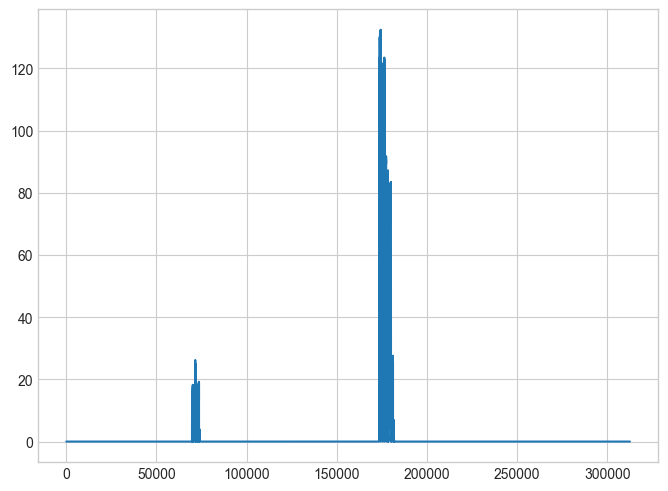

In [11]:
print("Megha Task Allocation Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Task Allocation Time"]

ax.plot(x, y)
# plt.savefig('Megha_GOOG.pdf')

Sparrow Task Allocation Time


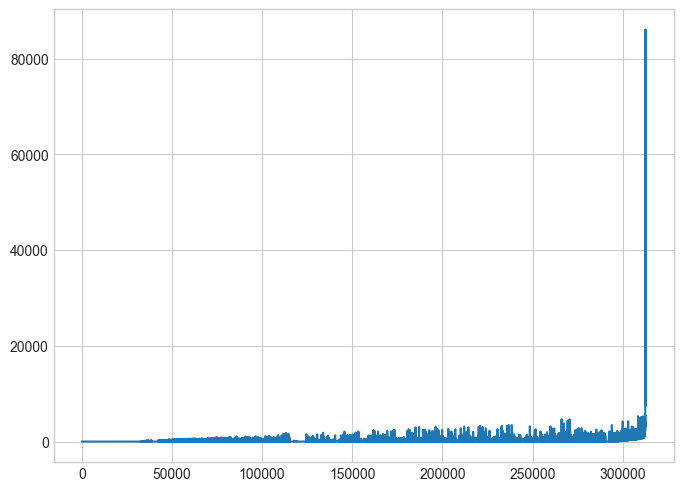

In [12]:
print("Sparrow Task Allocation Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Sparrow Task Allocation Time"]

ax.plot(x, y)

plt.show()

In [13]:
final_df.to_csv(BASE_FILE_PATH / Path("task_allocation_times.csv"))

In [14]:
final_df["Megha Task Allocation Time"].describe()

count    312558.000000
mean          1.687136
std          12.358069
min           0.001500
25%           0.001500
50%           0.001500
75%           0.001500
max         132.453500
Name: Megha Task Allocation Time, dtype: float64

In [15]:
final_df["Sparrow Task Allocation Time"].describe()

count    312558.000000
mean        166.285840
std         355.339798
min           0.001500
25%           0.001500
50%           0.001500
75%         280.637500
max       86027.998500
Name: Sparrow Task Allocation Time, dtype: float64

---